In [5]:
import sys
sys.path.append('../') # Change path
from Functions import * 
import copy
%store -r points
num_samples = 4 

In [6]:
# Matrix Y, containing all possilbe edges
Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

In [7]:
# Adding stopping criteria
alpha = 5 # Change alpha here
prev_grad = 200 
grad = 0
k = 0
n = 100000
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum
points_copy_prior = copy.deepcopy(points)

while abs(prev_grad - grad) > 0.01: # stopping criteria
    prev_grad = grad
    for i in range(1,num_samples+1): # Run over number of num_samples
        grad_sum[k] += np.sum(Gradient_function_prior_fast(i,2,Y,points_copy_prior,alpha)**2)
        points_copy_prior[i] += LR(k)*Gradient_function_prior_fast(i,2,Y,points_copy_prior,alpha) # Use Gradient_function and take step=0.1*grad
    grad = grad_sum[k]
    MLL[k] = Loss_function_prior_fast(points_copy_prior,Y,2, alpha) # Calcualte the probability using Loss_function
    k += 1


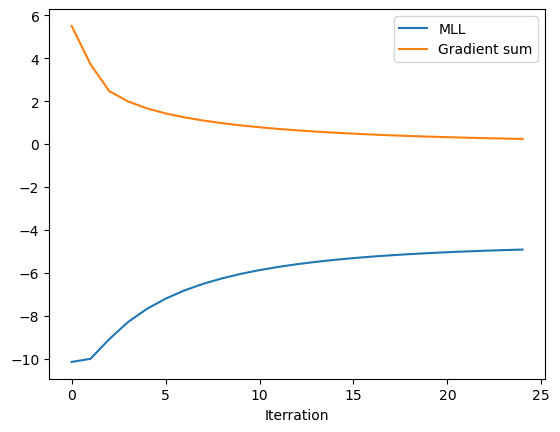

In [11]:
plt.plot(MLL[0:k],label='MLL')
plt.plot(np.sqrt(grad_sum[0:k]), label='Gradient sum')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

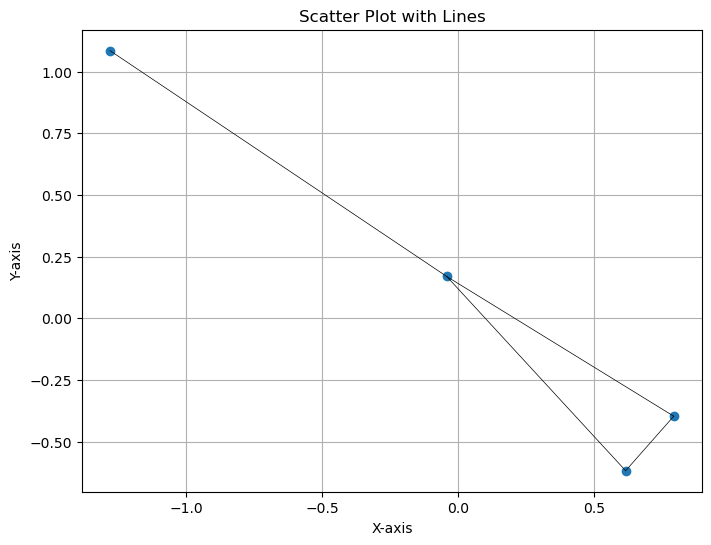

In [8]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points_copy_prior[Y[m][1]]
        point2 = points_copy_prior[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points_copy_prior.values()]
y = [point[1] for point in points_copy_prior.values()]
plt.scatter(x, y)#, color=['red', 'green', 'blue', 'purple'])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Lines')
plt.grid(True)
plt.show()